In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go 
import colorlover as cl
from plotly.subplots import make_subplots


<Axes: >

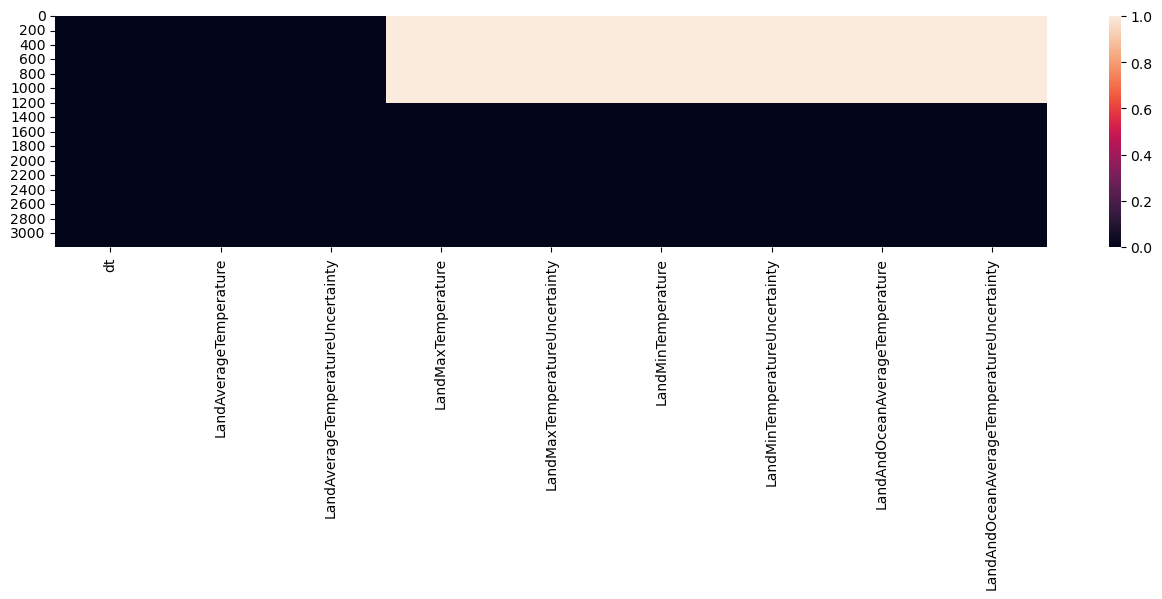

In [6]:
#Read data
data = pd.read_csv("/Users/megcheng/Desktop/visualization/Climate Change_Earth Surface Temperature Data/GlobalTemperatures.csv")
data.head(2)

copy = data.copy()

data.isna().sum()
plt.figure(figsize = (16, 3))
sns.heatmap(data.isna())

In [36]:
data.dropna(axis = 0, inplace = True)

data['Date'] = pd.to_datetime(data.dt)

data2 = data.copy()
data2.drop(columns = ['dt'], axis =1 , inplace = True)

data2['day'] = data2['Date'].dt.day
#data2['week'] = data2['Date'].dt.week
data2['month'] = data2['Date'].dt.month
data2['year'] = data2['Date'].dt.year

#data2['week'].value_counts()

earth_data = data2.groupby(by = 'year')[['LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty']].mean().reset_index()
earth_data

earth_data['turnpoint'] = np.where(earth_data['year'] <= 1975, 'before', 'after')
earth_data.head(2)

,year,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,turnpoint
0,1850,7.900667,0.876417,13.476667,2.394833,1.964333,1.571167,14.867167,0.308167,before
1,1851,8.178583,0.881917,13.081000,2.397250,2.203917,1.632417,14.991833,0.312083,before


In [37]:
earth_data[['LandAverageTemperature', 'LandMaxTemperature', 
       'LandMinTemperature', 'LandAndOceanAverageTemperature']].describe()

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
count,166.000000,166.000000,166.000000,166.000000
mean,8.571583,14.350601,2.743595,15.212566
std,0.473687,0.447741,0.614124,0.298629
min,7.558583,13.081000,1.525083,14.740083
25%,8.195708,14.055917,2.262562,14.991208
50%,8.540750,14.307708,2.734917,15.144208
75%,8.791250,14.539167,3.126833,15.379104
max,9.831000,15.572667,4.148833,16.058583


In [129]:
countries = pd.read_csv("/Users/megcheng/Desktop/visualization/Climate Change_Earth Surface Temperature Data/GlobalLandTemperaturesByCity.csv")


copy['Date'] = pd.to_datetime(copy.dt)
copy['year'] = copy['Date'].dt.year
land_avg = copy.groupby('year')[['LandAverageTemperature', 
                                'LandAverageTemperatureUncertainty']].mean().reset_index()
#draw a plot
fig = go.Figure()
fig.update_layout(title="Land Average Temperature: 1750-2010", title_font_size = 20,
                   font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                   template = "ggplot2", hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

fig.add_trace(go.Scatter(x = land_avg['year'], y = land_avg['LandAverageTemperature'], mode = 'lines',
                         name = 'Land Avg Temp', marker_color='rgb(128, 0, 0)'))

fig.add_trace(go.Scatter(x = land_avg['year'], y = land_avg['LandAverageTemperatureUncertainty'], mode = 'lines',
                         name = 'Land Avg Temp Error', marker_color = 'rgb(107,142,35)'))

In [4]:
countries = pd.read_csv("/Users/megcheng/Desktop/visualization/Climate Change_Earth Surface Temperature Data/GlobalLandTemperaturesByCity.csv")

countries['Date'] = pd.to_datetime(countries['dt'])

# invalid_dates = countries[countries['Date'].isnull()]['dt']
# if not invalid_dates.empty:
#     print(f"Invalid date values found: {invalid_dates}")
    
# countries = countries.dropna(subset=['Date'])
countries['year'] = countries['Date'].dt.year

countries.drop(columns = ['dt'], axis =1 , inplace = True)

by_year = countries.groupby(by=['year', 'City', 'Country', 'Latitude', 'Longitude']).mean().reset_index()
#by_year['City'] = by_year['City'].str.extract('([A-Za-z]+)', expand=False)
by_year

continent_map = pd.read_csv("/Users/megcheng/Desktop/visualization/Climate Change_Earth Surface Temperature Data/continents2.csv")

continent_map['Country'] = continent_map['name']
continent_map = continent_map[['Country', 'region', 'alpha-2', 'alpha-3']]

data = pd.merge(left = by_year, right = continent_map, on = 'Country', how = 'left')

data = data[data['year'] >= 1825]
 
data    
# cities = data.dropna(axis = 0).groupby(by = ['year','City', 'Country', 'Latitude', 'Longitude', 'region', 'alpha-2', 'alpha-3']).mean().reset_index()
# region = data.dropna(axis = 0).groupby(by = ['region', 'year']).mean().reset_index()
# #countries = data.dropna(axis = 0).groupby(by = ['region', 'Country', 'year']).mean().reset_index()  

,year,City,Country,Latitude,Longitude,AverageTemperature,AverageTemperatureUncertainty,Date,region,alpha-2,alpha-3
83246,1825,A Coruña,Spain,42.59N,8.73W,13.315833,2.189667,1825-06-16 12:00:00,Europe,ES,ESP
83247,1825,Aachen,Germany,50.63N,6.34E,9.516000,2.239167,1825-06-16 12:00:00,Europe,DE,DEU
83248,1825,Aalborg,Denmark,57.05N,10.33E,8.307750,2.322083,1825-06-16 12:00:00,Europe,DK,DNK
83249,1825,Abadan,Iran,29.74N,48.00E,NaN,NaN,1825-06-16 12:00:00,Asia,IR,IRN
83250,1825,Abakan,Russia,53.84N,91.36E,-0.613583,2.234500,1825-06-16 12:00:00,Europe,RU,RUS
...,...,...,...,...,...,...,...,...,...,...,...
718326,2013,Århus,Denmark,57.05N,10.33E,8.497625,0.375250,2013-05-01 18:40:00,Europe,DK,DNK
718327,2013,Çorlu,Turkey,40.99N,27.69E,15.796875,0.498125,2013-05-01 18:40:00,Asia,TR,TUR
718328,2013,Çorum,Turkey,40.99N,34.08E,12.800375,0.379500,2013-05-01 18:40:00,Asia,TR,TUR
718329,2013,Öskemen,Kazakhstan,50.63N,82.39E,4.595500,0.644250,2013-05-01 18:40:00,Asia,KZ,KAZ


In [134]:
# Read the file (countries + cities)
countries = pd.read_csv("/Users/megcheng/Desktop/visualization/Climate Change_Earth Surface Temperature Data/GlobalLandTemperaturesByCity.csv")


# Because the file is very big and there are many dates missing (like the last file), we will group by year
# create column year
countries['Date'] = pd.to_datetime(countries['dt'])
countries['year'] = countries['Date'].dt.year

# Group by year
by_year = countries.groupby(by = ['year', 'City', 'Country', 'Latitude', 'Longitude']).mean().reset_index()

continent_map = pd.read_csv("../input/country-mapping-iso-continent-region/continents2.csv")
continent_map['Country'] = continent_map['name']
continent_map = continent_map[['Country', 'region', 'alpha-2', 'alpha-3']]

# Add information
data = pd.merge(left = by_year, right = continent_map, on = 'Country', how = 'left')

# Filter starting 1825 - because some countries weren't monitored before this year on some periods, 
# the mean overall could be quite misleading (example: Americas have an increase from 1821 to 1825 of 5 points in temperature,
# but this happens only because in 1824 data for South America started to be collected)
data = data[data['year'] >= 1825]


TypeError: Could not convert 1743-11-011743-12-01 to numeric